## Prepare city

In [1]:
import blocksnet as bn

city = bn.City.from_pickle('new_model.pickle')

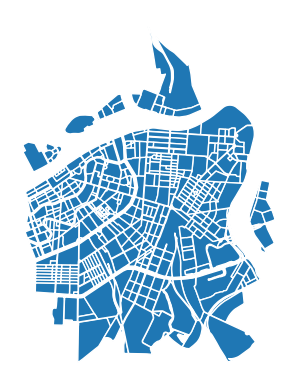

In [2]:
blocks = city.get_blocks_gdf(True)
nearest_blocks = blocks.sjoin_nearest(blocks[blocks.index == 1445], distance_col='distance')
nearest_blocks = nearest_blocks[nearest_blocks['distance']<=3000]
nearest_blocks.plot().set_axis_off()

In [3]:
city._blocks = {i:city[i] for i in nearest_blocks.index}

## Integration

In [4]:
from blocksnet.method.integration.integration import Integration, IntegrationType

integ = Integration(city_model=city)

/home/vasilstar/masterplanning/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 5590/5590 [00:23<00:00, 240.04it/s]


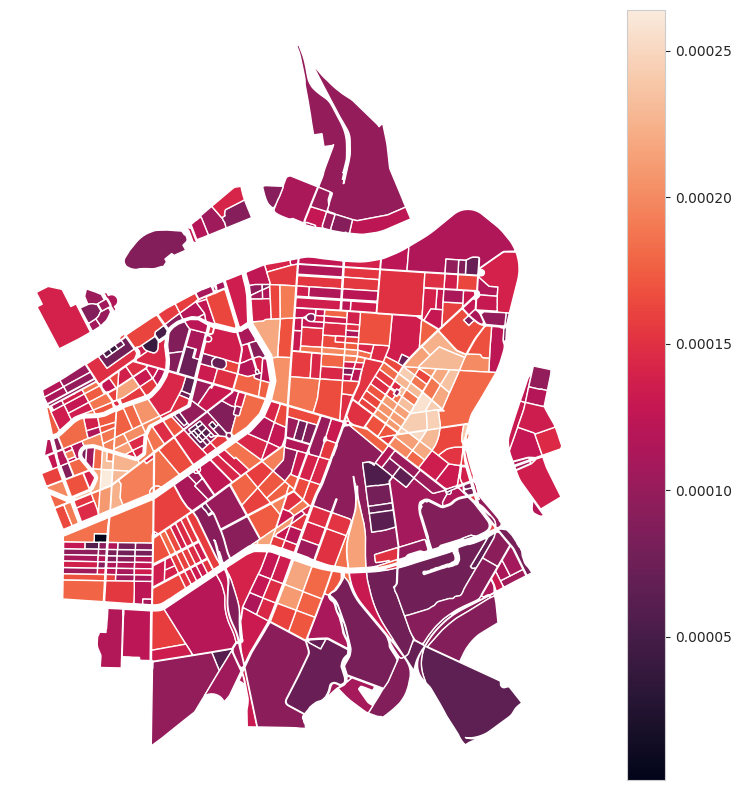

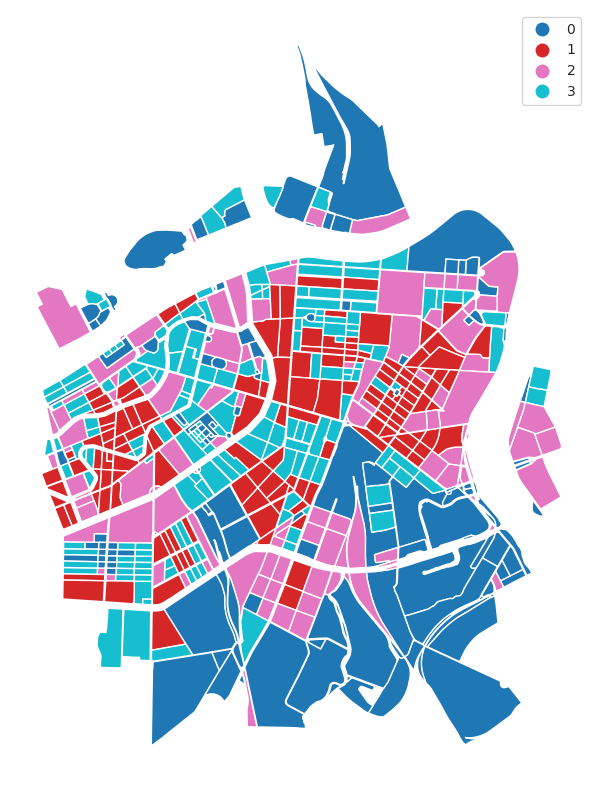

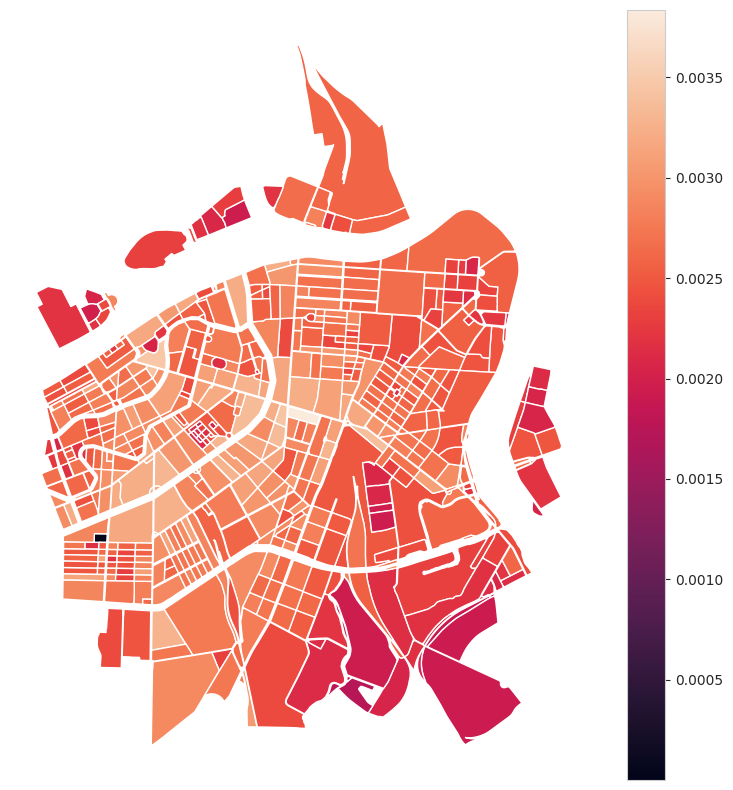

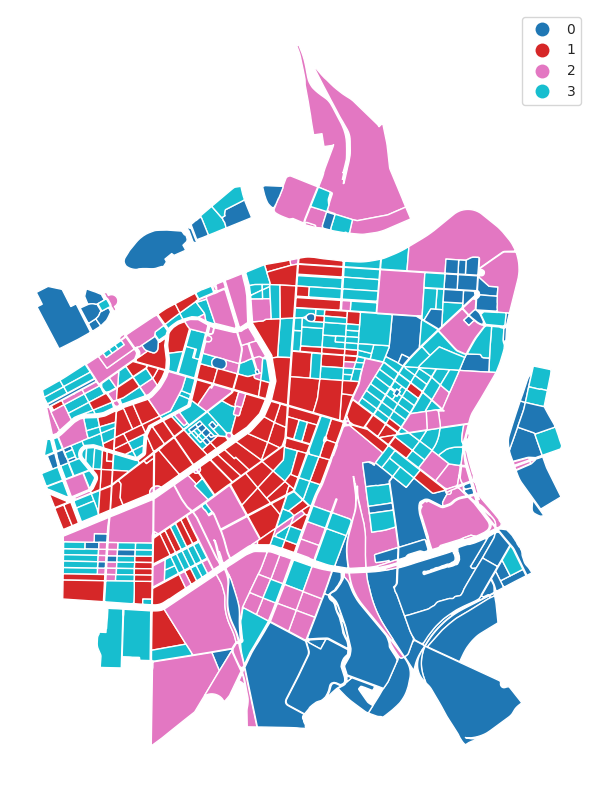

In [11]:
for integration_type in IntegrationType:
  res = integ.calculate(integration_type)
  res = integ.clusterize(res)
  integ.plot(res, column='integration')
  integ.plot(res, column='cluster')